In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/indian-marriage-and-divorce-dataset/marriage_divorce_india_with_id.csv')

In [3]:
data.head()

,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes


In [4]:
data['Income Level (INR per month)'].min()

5287

In [5]:
data['Income Level (INR per month)'].max()

199999

In [6]:
data.isna().sum()

Unique ID                       0
Marriage Duration (Years)       0
Age at Marriage                 0
Marriage Type                   0
Education Level                 0
Income Level (INR per month)    0
Caste/Religion                  0
Urban/Rural                     0
Family Involvement              0
Children                        0
Divorce Status                  0
dtype: int64

In [7]:
data.columns

Index(['Unique ID', 'Marriage Duration (Years)', 'Age at Marriage',
       'Marriage Type', 'Education Level', 'Income Level (INR per month)',
       'Caste/Religion', 'Urban/Rural', 'Family Involvement', 'Children',
       'Divorce Status'],
      dtype='object')

### Divorce status

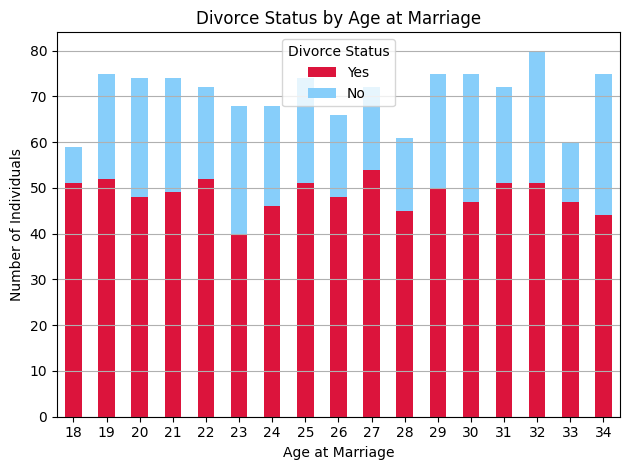

In [8]:
divorce_counts = data.groupby(['Age at Marriage', 'Divorce Status']).size().unstack()
divorce_counts.plot(kind='bar', stacked=True, color=['crimson', 'lightskyblue'])
plt.title('Divorce Status by Age at Marriage')
plt.xlabel('Age at Marriage')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Divorce Status', labels=['Yes', 'No'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
data['Age at Marriage'].mean()

26.055

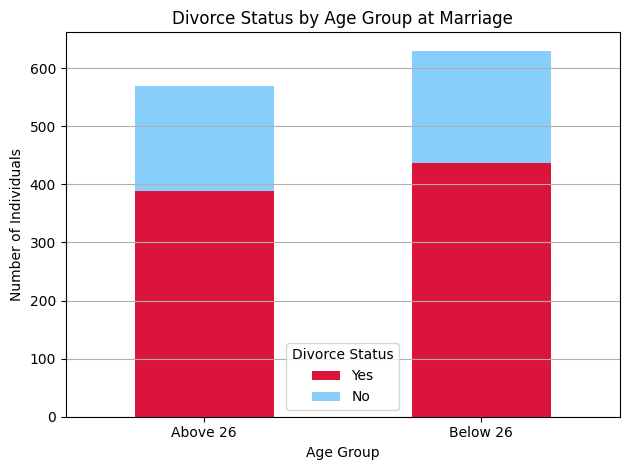

In [10]:
mean_age = data['Age at Marriage'].mean()
data['Age Group'] = data['Age at Marriage'].apply(lambda x: 'Below 26' if x < mean_age else 'Above 26')
divorce_counts = data.groupby(['Age Group', 'Divorce Status']).size().unstack(fill_value=0)

divorce_counts.plot(kind='bar', stacked=True, color=['crimson', 'lightskyblue'])
plt.title('Divorce Status by Age Group at Marriage')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Divorce Status', labels=['Yes', 'No'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

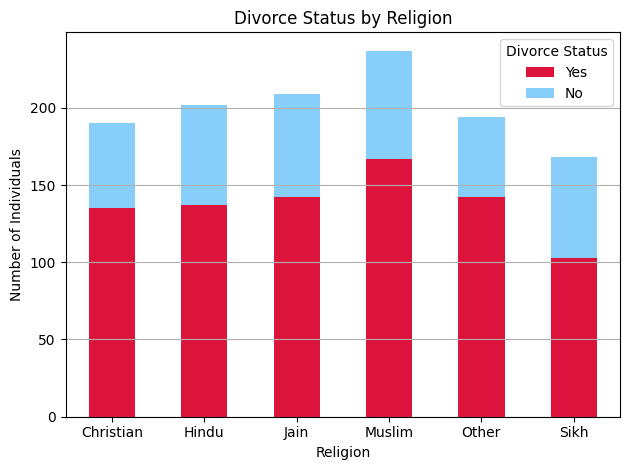

In [11]:
divorce_counts = data.groupby(['Caste/Religion', 'Divorce Status']).size().unstack()
divorce_counts.plot(kind='bar', stacked=True, color=['crimson', 'lightskyblue'])
plt.title('Divorce Status by Religion')
plt.xlabel('Religion')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Divorce Status', labels=['Yes', 'No'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

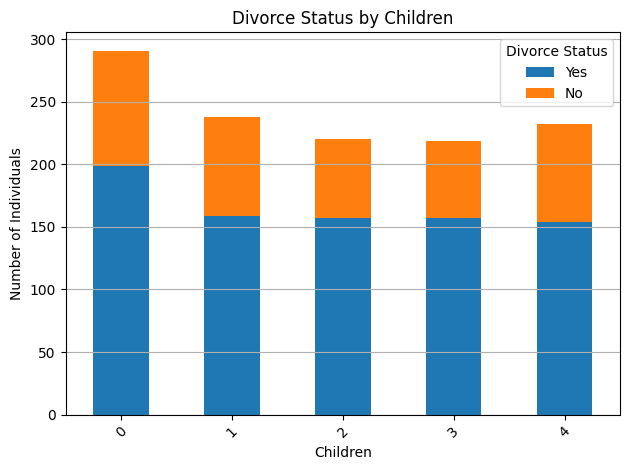

In [12]:
education_divorce_counts = data.groupby(['Children', 'Divorce Status']).size().unstack()

education_divorce_counts.plot(kind='bar', stacked=True)
plt.title('Divorce Status by Children')
plt.xlabel('Children')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Divorce Status', labels=['Yes', 'No'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

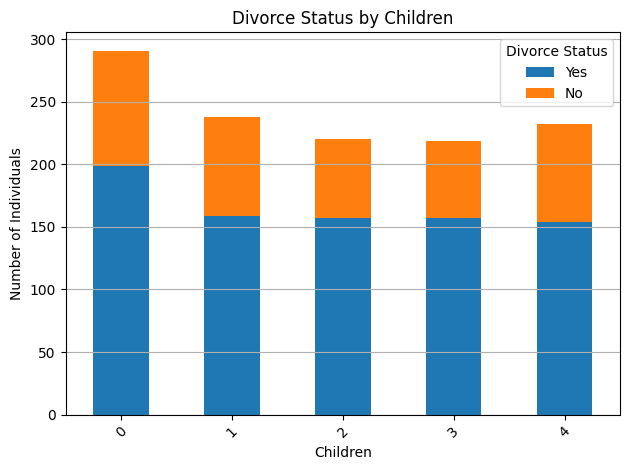

In [13]:
education_divorce_counts = data.groupby(['Children', 'Divorce Status']).size().unstack()

education_divorce_counts.plot(kind='bar', stacked=True)
plt.title('Divorce Status by Children')
plt.xlabel('Children')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Divorce Status', labels=['Yes', 'No'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

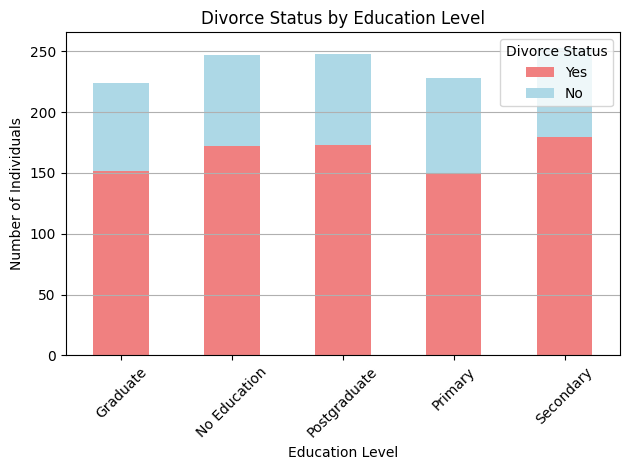

In [14]:
education_divorce_counts = data.groupby(['Education Level', 'Divorce Status']).size().unstack()

education_divorce_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Divorce Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.legend(title='Divorce Status', labels=['Yes', 'No'])
plt.grid(axis='y')

plt.tight_layout()
plt.show()

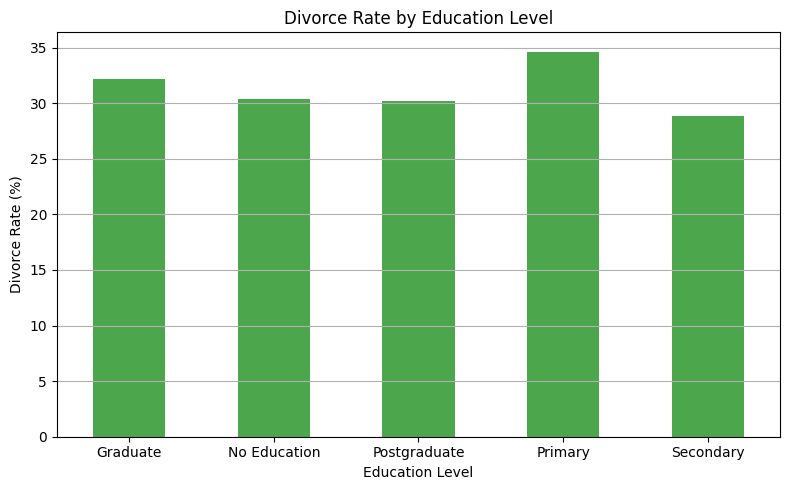

In [15]:
divorce_counts = data.groupby('Education Level')['Divorce Status'].value_counts().unstack()
divorce_rates = divorce_counts.div(divorce_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 5))
divorce_rates['Yes'].plot(kind='bar', color='green', alpha=0.7)
plt.title('Divorce Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Divorce Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()